In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [3]:
# Assumindo que: se tem promocao a loja esta aberta
for idx in dfteste[dfteste.isna().values]['Open'].index:
    dfteste['Open'][idx] = dfteste['Promo'][idx]

In [4]:
def strToInt(x):
    if x == 0 or x == '0':
        return 1
    elif x == 'a':
        return 2
    elif x == 'b':
        return 3
    elif x == 'c':
        return 4
    else:
        return 5

dftreino['StateHoliday'] = dftreino['StateHoliday'].apply(lambda x: strToInt(x))
dfteste['StateHoliday'] = dfteste['StateHoliday'].apply(lambda x: strToInt(x))

In [5]:
dflojas['CompetitionDistance'].fillna(np.mean(dflojas['CompetitionDistance']), inplace=True)
dflojas['CompetitionOpenSinceMonth'].fillna(np.mean(dflojas['CompetitionOpenSinceMonth']), inplace=True)
dflojas['CompetitionOpenSinceYear'].fillna(np.mean(dflojas['CompetitionOpenSinceYear']), inplace=True)

In [6]:
dflojassemnas = dflojas.fillna(0)

In [7]:
def interval(x):
    if x == 'Feb,May,Aug,Nov':
        return 1
    elif x == 'Jan,Apr,Jul,Oct':
        return 2
    elif x == 'Mar,Jun,Sept,Dec':
        return 3
    else:
        return x
dflojassemnas['PromoInterval'] = dflojassemnas['PromoInterval'].apply(lambda x: interval(x))
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,2
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,2
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [8]:
def storetype(x):
    if x == 0 or x == '0':
        return 1
    elif x == 'a':
        return 2
    elif x == 'b':
        return 3
    elif x == 'c':
        return 4
    else:
        return 5

dflojassemnas['StoreType'] = dflojassemnas['StoreType'].apply(lambda x: storetype(x))
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,2,a,570.0,11.0,2007.0,1,13.0,2010.0,2
2,3,2,a,14130.0,12.0,2006.0,1,14.0,2011.0,2
3,4,4,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,2,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [9]:
def assortment(x):
    if x == 0 or x == '0':
        return 1
    elif x == 'a':
        return 2
    elif x == 'b':
        return 3
    elif x == 'c':
        return 4
    else:
        return 5

dflojassemnas['Assortment'] = dflojassemnas['Assortment'].apply(lambda x: assortment(x))
dflojassemnas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,2,2,570.0,11.0,2007.0,1,13.0,2010.0,2
2,3,2,2,14130.0,12.0,2006.0,1,14.0,2011.0,2
3,4,4,4,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,2,2,29910.0,4.0,2015.0,0,0.0,0.0,0


In [10]:
dftreinamento = pd.merge(dftreino, dflojassemnas, on='Store', how='inner')
dfcompeticao = pd.merge(dfteste, dflojassemnas, on='Store', how='inner')

In [11]:
dftreinamento = dftreinamento[dftreinamento['Open']!=0]
#dfcompeticao = dfcompeticao[dfcompeticao['Open']!=0]

In [12]:
dftreinamento['Year'] = dftreinamento['Date'].apply(lambda data: pd.to_datetime(data).year)
dftreinamento['Month'] = dftreinamento['Date'].apply(lambda data: pd.to_datetime(data).month)
dftreinamento['Day'] = dftreinamento['Date'].apply(lambda data: pd.to_datetime(data).day)

In [13]:
dfcompeticao['Year'] = dfcompeticao['Date'].apply(lambda data: pd.to_datetime(data).year)
dfcompeticao['Month'] = dfcompeticao['Date'].apply(lambda data: pd.to_datetime(data).month)
dfcompeticao['Day'] = dfcompeticao['Date'].apply(lambda data: pd.to_datetime(data).day)

In [14]:
dftreinamento.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [15]:
X = dftreinamento[['DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Day', 'Month', 'Year']]
y = dftreinamento['Sales']

In [16]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25)

lm = LinearRegression()
lm.fit(X_train, y_train)

predicao = lm.predict(X_test)

score = r2_score(y_test, predicao)
score

0.18416915964651437

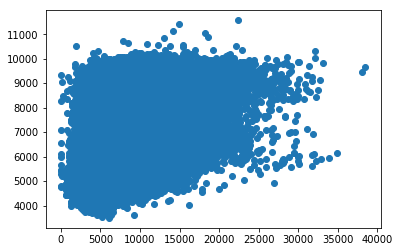

In [18]:
plt.scatter(y_test, predicao)

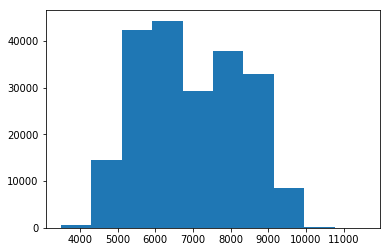

In [19]:
plt.hist(predicao)
plt.show()

In [20]:
mean = np.mean(dftreinamento['Sales'], axis=0)
median = np.median(dftreinamento['Sales'], axis=0)
sd = np.std(dftreinamento['Sales'], axis=0)
outliers = mean+(2*sd)
outliers

13163.939975339517

In [21]:
dftreinamento[dftreinamento['Sales']>outliers].shape[0]/dftreinamento['Sales'].shape[0]*100

4.223630730750647

In [22]:
semoutliers = dftreinamento[dftreinamento['Sales']<outliers]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7ed45dac88>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7ed45e7908>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7ed45dab38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ed45e7e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ed456e5c0>],
 'means': []}

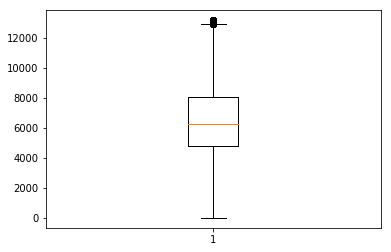

In [23]:
fig, ax = plt.subplots()
ax.boxplot(semoutliers['Sales'])

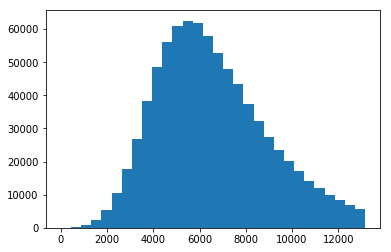

In [24]:
plt.hist(semoutliers['Sales'], bins = 30)
plt.show()

In [25]:
X = semoutliers[['DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Day', 'Month', 'Year']]
y = semoutliers['Sales']

In [26]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25)

In [28]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dtpredict = dt.predict(X_test)
dtscore = r2_score(y_test, dtpredict)
dtscore

0.7558485959403695

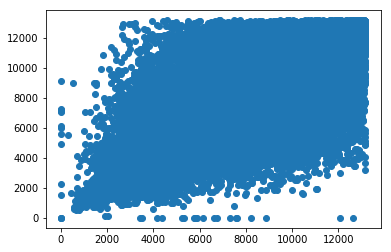

In [29]:
plt.scatter(y_test, dtpredict)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

predicao = lm.predict(X_test)

score = r2_score(y_test, predicao)
score

0.19762179928849866

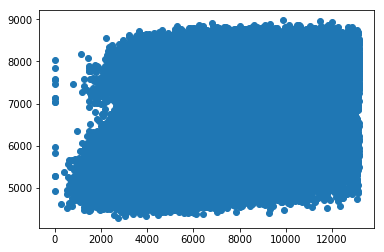

In [31]:
plt.scatter(y_test, predicao)

In [32]:
len(dfcompeticao)

41088

In [33]:
XComp = dfcompeticao[['DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Day', 'Month', 'Year']]

scaler = MinMaxScaler(feature_range = (0, 1))
XComp_scaled = scaler.fit_transform(XComp)

In [34]:
predictCompDT = dt.predict(XComp_scaled)

dfPreditoDT = pd.DataFrame(predictCompDT)
dfPreditoDT.index = np.arange(1, len(dfPreditoDT)+1)
dfPreditoDT.to_csv('decisiontree_final.csv')

In [35]:
predcomp = lm.predict(XComp_scaled)

In [36]:
predcomp

array([7724.14158351, 7820.76206931, 7917.3825551 , ..., 7611.78022002,
       5225.5807535 , 5322.2012393 ])

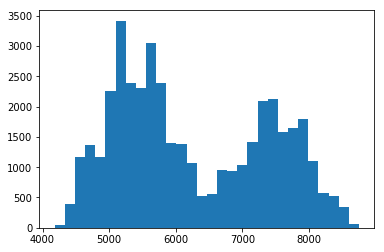

In [37]:
plt.hist(predcomp, bins = 30)
plt.show()

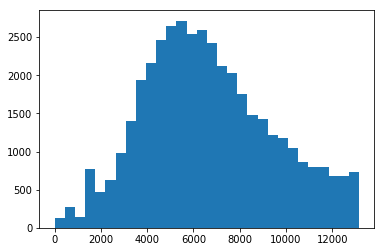

In [38]:
plt.hist(predictCompDT, bins = 30)
plt.show()

In [39]:
dfPredito = pd.DataFrame(predcomp)
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.to_csv('linearregrassion-thelast4.csv')

In [40]:
# Customers Mean

In [41]:
dfcompeticao['Customers'] = semoutliers['Customers'].mean()

In [42]:
X2 = semoutliers[['DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Day', 'Month', 'Year']]
y2 = semoutliers['Sales']

In [43]:
scaler = MinMaxScaler(feature_range = (0, 1))
X2_scaled = scaler.fit_transform(X2)

In [44]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size = 0.25)

lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

predicao2 = lm2.predict(X2_test)

score2 = r2_score(y2_test, predicao2)
score2

0.19893808721675688

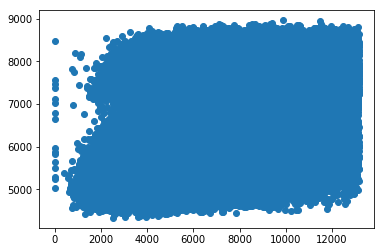

In [45]:
plt.scatter(y2_test, predicao2)

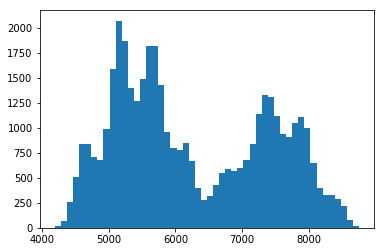

In [46]:
XComp2 = dfcompeticao[['DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Day', 'Month', 'Year']]

scaler = MinMaxScaler(feature_range = (0, 1))
XComp2_scaled = scaler.fit_transform(XComp2)

predcomp2 = lm2.predict(XComp2_scaled)
plt.hist(predcomp2, bins = 50)
plt.show()

In [47]:
dfPredito = pd.DataFrame(predcomp2)
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.to_csv('linearregrassion-thelast5.csv')